In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stripROtools
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.optimize import curve_fit
from scipy.stats import crystalball
from stripROtools import colors




In [30]:
# Load exp data
df_exp = pd.read_pickle("./data/resolution_exp.pk")

# Load sim data
df_sim = pd.read_pickle("./data/resolution_sim.pk")


df_sim.head()

,Name,x_res,x_res_err,y_res,y_res_err,abs_z
0,UH_DLC_a,"[34.045612937729175, 37.93117629440438, 42.201...","[0.7774841621400261, 0.8847999379596257, 1.204...","[32.464293076702376, 37.59738400218201, 38.875...","[0.7001572914125886, 0.8736214967563497, 1.030...","[0.2, 0.4, 0.6, 0.8, 1.0]"
1,UH_NoDLC_a,"[35.791632016640094, 36.263705497496524, 40.36...","[0.7563048047957545, 0.772270965779326, 0.9434...","[35.18306153858504, 37.957143598248685, 40.663...","[0.7420353250853728, 0.9042310778405518, 0.957...","[0.2, 0.4, 0.6, 0.8, 1.0]"
2,UoS,"[40.56625036440854, 42.462545457024305, 44.868...","[1.8554779326656698, 1.9656106776320232, 1.997...","[34.444773219054376, 39.95694579568049, 42.980...","[1.6690208566163975, 1.8642747571056064, 1.971...","[0.2, 0.4, 0.6, 0.8, 1.0]"


In [31]:
# fit function used to determine contributions to effective point resolution that are not included in simulation
def fit(x, a):
	return np.sqrt(x**2 + a**2)

# UH DLC Quadrant a

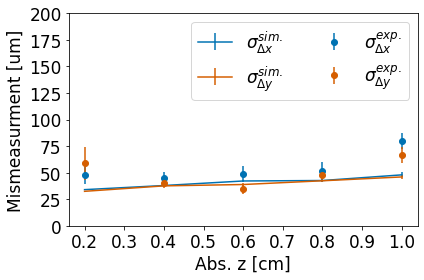

In [32]:
# index specifying detector
index = 0

abs_z = np.array(df_exp.iloc[index].abs_z)
x_res = np.array(df_exp.iloc[index].x_res)
x_res_err = np.array(df_exp.iloc[index].x_res_err)
y_res = np.array(df_exp.iloc[index].y_res)
y_res_err = np.array(df_exp.iloc[index].y_res_err)
x_res_sim = np.array(df_sim.iloc[index].x_res)
x_res_err_sim = np.array(df_sim.iloc[index].x_res_err)
y_res_sim = np.array(df_sim.iloc[index].y_res)
y_res_err_sim = np.array(df_sim.iloc[index].y_res_err)


plt.figure()
plt.errorbar(abs_z,x_res_sim,x_res_err_sim,color=colors["blue"],label="$\sigma_{\Delta x}^{sim.}$")
plt.errorbar(abs_z,y_res_sim,y_res_err_sim,color=colors["red"],label="$\sigma_{\Delta y}^{sim.}$")
plt.errorbar(abs_z,x_res,x_res_err, color=colors["blue"],fmt='o',label="$\sigma_{\Delta x}^{exp.}$")
plt.errorbar(abs_z,y_res,y_res_err, color=colors["red"],fmt='o',label="$\sigma_{\Delta y}^{exp.}$")
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(ncol=2,fontsize=17)
plt.ylim((0,200))
plt.xlabel("Abs. z [cm]",fontsize=17)
plt.ylabel("Mismeasurment [um]",fontsize=17)
plt.tight_layout()
plt.savefig("./figures/UH_DLC_PR.pdf")


In [33]:
# Fit simulation data + additional resolution term to experimental data on the x strips

x_vals = x_res_sim
sigmas = np.sqrt(x_res_err**2 + x_res_err_sim**2)
y_vals = x_res

coeff, covar = curve_fit(fit, x_vals, y_vals, sigma=sigmas, absolute_sigma=True)


print("The additional point res. contribution on the x strips is: ", coeff[0], "+/-", np.sqrt(np.diag(covar))[0])


x_vals = y_res_sim
sigmas = np.sqrt(y_res_err**2 + y_res_err_sim**2)
y_vals = y_res

coeff, covar = curve_fit(fit, x_vals, y_vals, sigma=sigmas, absolute_sigma=True)


print("The additional point res. contribution on the y strips is: ", coeff[0], "+/-", np.sqrt(np.diag(covar))[0])




The additional point res. contribution on the x strips is:  33.864391440239324 +/- 5.069681294873083
The additional point res. contribution on the y strips is:  17.010684113389523 +/- 6.78221152028607


# UH NoDLC Quadrant a

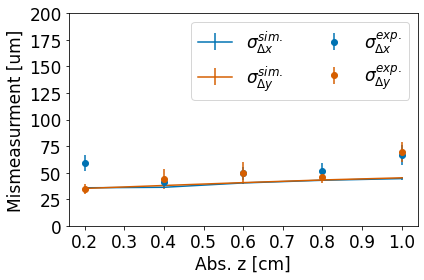

In [34]:
# index specifying detector
index = 1

abs_z = np.array(df_exp.iloc[index].abs_z)
x_res = np.array(df_exp.iloc[index].x_res)
x_res_err = np.array(df_exp.iloc[index].x_res_err)
y_res = np.array(df_exp.iloc[index].y_res)
y_res_err = np.array(df_exp.iloc[index].y_res_err)
x_res_sim = np.array(df_sim.iloc[index].x_res)
x_res_err_sim = np.array(df_sim.iloc[index].x_res_err)
y_res_sim = np.array(df_sim.iloc[index].y_res)
y_res_err_sim = np.array(df_sim.iloc[index].y_res_err)


plt.figure()
plt.errorbar(abs_z,x_res_sim,x_res_err_sim,color=colors["blue"],label="$\sigma_{\Delta x}^{sim.}$")
plt.errorbar(abs_z,y_res_sim,y_res_err_sim,color=colors["red"],label="$\sigma_{\Delta y}^{sim.}$")
plt.errorbar(abs_z,x_res,x_res_err, color=colors["blue"],fmt='o',label="$\sigma_{\Delta x}^{exp.}$")
plt.errorbar(abs_z,y_res,y_res_err, color=colors["red"],fmt='o',label="$\sigma_{\Delta y}^{exp.}$")
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(ncol=2,fontsize=17)
plt.ylim((0,200))
plt.xlabel("Abs. z [cm]",fontsize=17)
plt.ylabel("Mismeasurment [um]",fontsize=17)
plt.tight_layout()
plt.savefig("./figures/UH_NoDLC_PR.pdf")


In [35]:
# Fit simulation data + additional resolution term to experimental data on the x strips

x_vals = x_res_sim
sigmas = np.sqrt(x_res_err**2 + x_res_err_sim**2)
y_vals = x_res

coeff, covar = curve_fit(fit, x_vals, y_vals, sigma=sigmas, absolute_sigma=True)


print("The additional point res. contribution on the x strips is: ", coeff[0], "+/-", np.sqrt(np.diag(covar))[0])


x_vals = y_res_sim
sigmas = np.sqrt(y_res_err**2 + y_res_err_sim**2)
y_vals = y_res

coeff, covar = curve_fit(fit, x_vals, y_vals, sigma=sigmas, absolute_sigma=True)


print("The additional point res. contribution on the y strips is: ", coeff[0], "+/-", np.sqrt(np.diag(covar))[0])




The additional point res. contribution on the x strips is:  30.449573752128206 +/- 4.766080619188571
The additional point res. contribution on the y strips is:  18.441871747546138 +/- 7.09865747563936


# UoS Detector

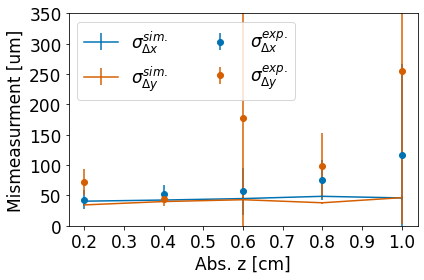

In [38]:
# index specifying detector
index = 2

##### Note!!! ##### 
# We switch x and y since the x strips are the upper strips in the (actual) UoS detector
# The plots in Po210.ipynb do not include this switch

abs_z = np.array(df_exp.iloc[index].abs_z)
x_res = np.array(df_exp.iloc[index].y_res)
x_res_err = np.array(df_exp.iloc[index].y_res_err)
y_res = np.array(df_exp.iloc[index].x_res)
y_res_err = np.array(df_exp.iloc[index].x_res_err)

x_res_sim = np.array(df_sim.iloc[index].x_res)
x_res_err_sim = np.array(df_sim.iloc[index].x_res_err)
y_res_sim = np.array(df_sim.iloc[index].y_res)
y_res_err_sim = np.array(df_sim.iloc[index].y_res_err)


plt.figure()
plt.errorbar(abs_z,x_res_sim,x_res_err_sim,color=colors["blue"],label="$\sigma_{\Delta x}^{sim.}$")
plt.errorbar(abs_z,y_res_sim,y_res_err_sim,color=colors["red"],label="$\sigma_{\Delta y}^{sim.}$")
plt.errorbar(abs_z,x_res,x_res_err, color=colors["blue"],fmt='o',label="$\sigma_{\Delta x}^{exp.}$")
plt.errorbar(abs_z,y_res,y_res_err, color=colors["red"],fmt='o',label="$\sigma_{\Delta y}^{exp.}$")
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(ncol=2,fontsize=17)
plt.ylim((0,350))
plt.xlabel("Abs. z [cm]",fontsize=17)
plt.ylabel("Mismeasurment [um]",fontsize=17)
plt.tight_layout()
plt.savefig("./figures/UoS_PR.pdf")


In [39]:
# Fit simulation data + additional resolution term to experimental data on the x strips


x_vals = x_res_sim
sigmas = np.sqrt(x_res_err**2 + x_res_err_sim**2)
y_vals = x_res

coeff, covar = curve_fit(fit, x_vals, y_vals, sigma=sigmas, absolute_sigma=True)


print("The additional point res. contribution on the x strips is: ", coeff[0], "+/-", np.sqrt(np.diag(covar))[0])


x_vals = y_res_sim
sigmas = np.sqrt(y_res_err**2 + y_res_err_sim**2)
y_vals = y_res

coeff, covar = curve_fit(fit, x_vals, y_vals, sigma=sigmas, absolute_sigma=True)


print("The additional point res. contribution on the y strips is: ", coeff[0], "+/-", np.sqrt(np.diag(covar))[0])




The additional point res. contribution on the x strips is:  29.286136434085034 +/- 17.505448099568667
The additional point res. contribution on the y strips is:  35.729516822231055 +/- 14.410787079274806
